In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

from flask import Flask, jsonify

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Save references to each table
Base.classes.keys()

['measurement', 'station']

In [10]:
measurementClass = Base.classes.measurement
stationClass = Base.classes.station


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
from datetime import datetime, timedelta 

In [13]:
dt.date(2017, 8, 23)

datetime.date(2017, 8, 23)

In [14]:
new_final_time = dt.date(2017, 8, 23) - timedelta(days = 365)
print(new_final_time)

2016-08-23


In [15]:
precinfo = session.query(measurementClass.date, measurementClass.prcp).filter(measurementClass.date > new_final_time).all()
print(precinfo)

[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

In [16]:
prec_df = pd.DataFrame(precinfo, columns = ["date", "prcp"])
print(prec_df)

            date  prcp
0     2016-08-24  0.08
1     2016-08-25  0.08
2     2016-08-26  0.00
3     2016-08-27  0.00
4     2016-08-28  0.01
...          ...   ...
2218  2017-08-19  0.09
2219  2017-08-20   NaN
2220  2017-08-21  0.56
2221  2017-08-22  0.50
2222  2017-08-23  0.45

[2223 rows x 2 columns]


In [17]:
prec_df.set_index('date')

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [18]:
prec_df.sort_values(by='date')

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


Text(0.5, 0, 'Date')

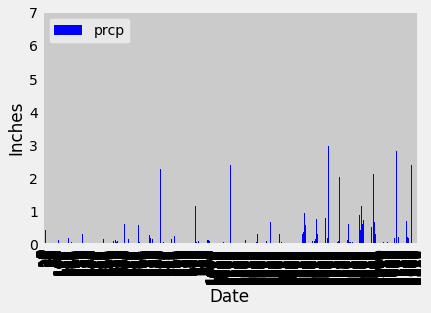

In [19]:
prec_df.plot(kind="bar", facecolor="blue")

plt.ylabel("Inches")
plt.xlabel("Date")

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Design a query to show how many stations are available in this dataset?


In [21]:
stationsinfo = session.query(stationClass.station).count()
print(stationsinfo)

9


In [22]:
stationsinfo2 = session.query(stationClass.station).all()
print(stationsinfo2)

[('USC00519397',), ('USC00513117',), ('USC00514830',), ('USC00517948',), ('USC00518838',), ('USC00519523',), ('USC00519281',), ('USC00511918',), ('USC00516128',)]


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [23]:
activeinfo = session.query(measurementClass.station, func.count(measurementClass.station)).\
group_by(measurementClass.station).order_by(func.count(measurementClass.station).desc()).all()
print(activeinfo)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [24]:
tempinfo = session.query(measurementClass.tobs).\
filter(measurementClass.station == 'USC00519281').all()
print(tempinfo)

[(70.0,), (62.0,), (74.0,), (75.0,), (74.0,), (76.0,), (69.0,), (66.0,), (70.0,), (75.0,), (64.0,), (60.0,), (61.0,), (68.0,), (64.0,), (66.0,), (67.0,), (70.0,), (67.0,), (67.0,), (69.0,), (60.0,), (75.0,), (75.0,), (65.0,), (75.0,), (69.0,), (67.0,), (66.0,), (69.0,), (72.0,), (67.0,), (65.0,), (64.0,), (67.0,), (67.0,), (68.0,), (69.0,), (66.0,), (69.0,), (61.0,), (71.0,), (70.0,), (70.0,), (66.0,), (71.0,), (61.0,), (68.0,), (67.0,), (62.0,), (65.0,), (69.0,), (63.0,), (62.0,), (61.0,), (64.0,), (72.0,), (68.0,), (68.0,), (68.0,), (71.0,), (69.0,), (65.0,), (67.0,), (71.0,), (70.0,), (69.0,), (69.0,), (70.0,), (69.0,), (70.0,), (73.0,), (74.0,), (67.0,), (68.0,), (64.0,), (65.0,), (68.0,), (68.0,), (72.0,), (67.0,), (64.0,), (71.0,), (70.0,), (72.0,), (73.0,), (74.0,), (69.0,), (71.0,), (72.0,), (71.0,), (74.0,), (73.0,), (71.0,), (71.0,), (69.0,), (69.0,), (72.0,), (68.0,), (75.0,), (69.0,), (65.0,), (68.0,), (65.0,), (66.0,), (64.0,), (69.0,), (69.0,), (70.0,), (69.0,), (69.0,), 

In [25]:
temp_df = pd.DataFrame(tempinfo, columns = ["tobs"])
print(temp_df)

      tobs
0     70.0
1     62.0
2     74.0
3     75.0
4     74.0
...    ...
2767  77.0
2768  77.0
2769  76.0
2770  76.0
2771  79.0

[2772 rows x 1 columns]


In [26]:
temp_df.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [27]:
hightempinfo = session.query(measurementClass.date, measurementClass.tobs).\
filter(measurementClass.date > new_final_time).\
filter(measurementClass.station == 'USC00519281').all()
print(hightempinfo)

[('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10-07', 76.0), ('2016-10

In [28]:
hightemp_df = pd.DataFrame(hightempinfo, columns = ["date","tobs"])
print(hightemp_df)

           date  tobs
0    2016-08-24  77.0
1    2016-08-25  80.0
2    2016-08-26  80.0
3    2016-08-27  75.0
4    2016-08-28  73.0
..          ...   ...
346  2017-08-14  77.0
347  2017-08-15  77.0
348  2017-08-16  76.0
349  2017-08-17  76.0
350  2017-08-18  79.0

[351 rows x 2 columns]


Text(0.5, 0, 'Date')

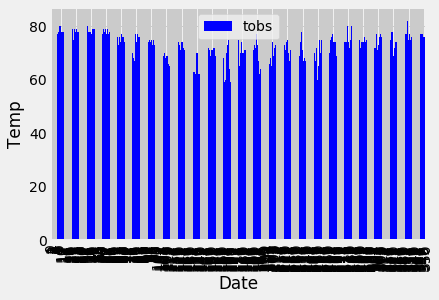

In [29]:
hightemp_df.plot(kind="bar", facecolor="blue")

plt.ylabel("Temp")
plt.xlabel("Date")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
